# Predicting King County House Prices

This dataset includes the price of homes in King County, Washington from sales between May 2014 and May 2015.
It also contains information on 18 features of the homes, the date of sale,
and the ID of the home being sold. id - Unique ID for each home sold.

In this project, we are trying to understand the relationship between house features and how these variables are used to predict house price. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
#Loading data
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [6]:
# let's drop unnecessory featurs
df= df.drop('id',axis=1)
df = df.drop('zipcode',axis=1)

In [7]:
#check the null value 
#df.isnull()
#df.isnull().sum()
df.isnull().sum().sum()

0

In [8]:
#check duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [9]:
#drop the duplicate rows 
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index =False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [10]:
#convert the type of  date column 
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

# Data Visualization

<AxesSubplot:title={'center':'Dataset'}, xlabel='bedrooms', ylabel='price'>

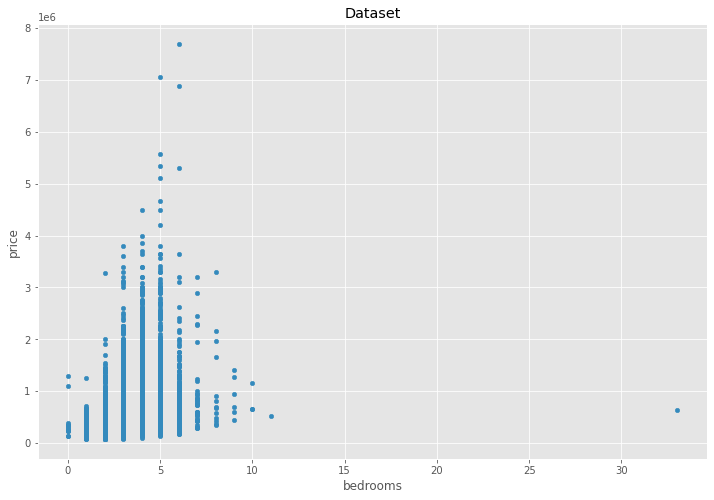

In [12]:
df.plot.scatter(x='bedrooms', y='price', title='Dataset')

The outliers in the bedroom column are obvious so need to be handle.
maximum value of bedroom is 33!

In [13]:
sort=df.sort_values(by='bedrooms', ascending=False)
sort.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15870,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,47.6878,-122.331,1330,4700
8757,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,47.5560,-122.363,1420,4960
15161,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,47.5705,-122.175,2040,11914
13314,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,47.5861,-122.113,2730,10400
19254,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,47.6635,-122.320,1810,3745


We can notice in the first row in the previous table that the value of 33 was assigned to the number of bedrooms by mistake,
so that it is not reasonable that the number of bedrooms and the number of toilets is 1.75 in the same house.

In [14]:
df['bedrooms'] = np.where(df['bedrooms'] == 33, 3, df['bedrooms'])

In [15]:
df.iloc[15870]

date             2014-06-25 00:00:00
price                       640000.0
bedrooms                           3
bathrooms                       1.75
sqft_living                     1620
sqft_lot                        6000
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object

<AxesSubplot:title={'center':'Dataset'}, xlabel='bedrooms', ylabel='price'>

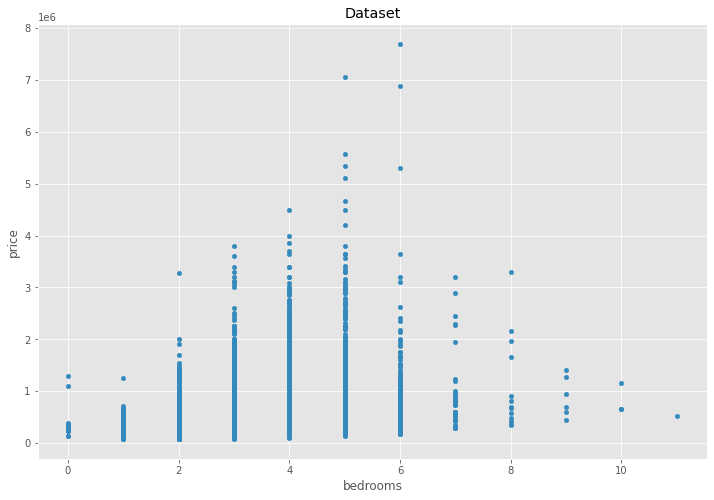

In [16]:
df.plot.scatter(x='bedrooms', y='price', title='Dataset')

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


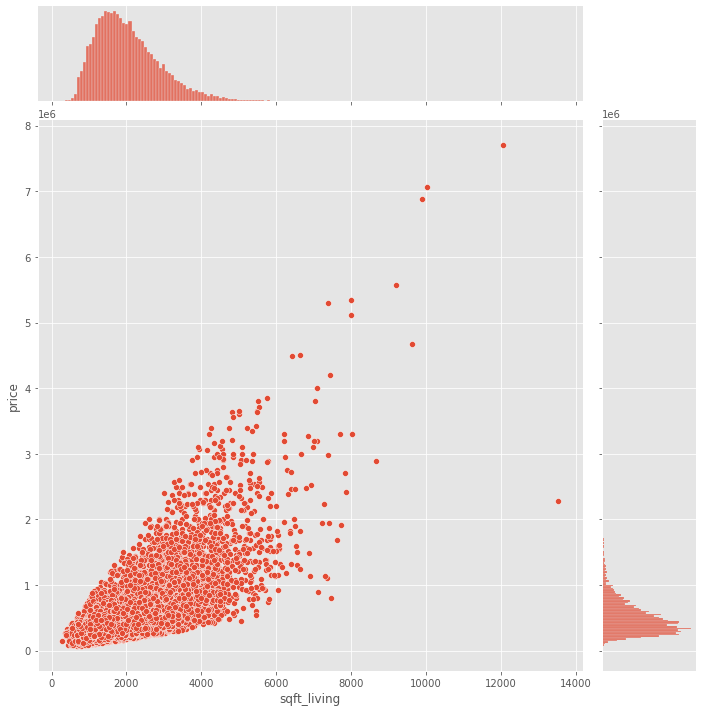

In [17]:
sns.jointplot(x="sqft_living", y="price", data=df, size=10)

<AxesSubplot:>

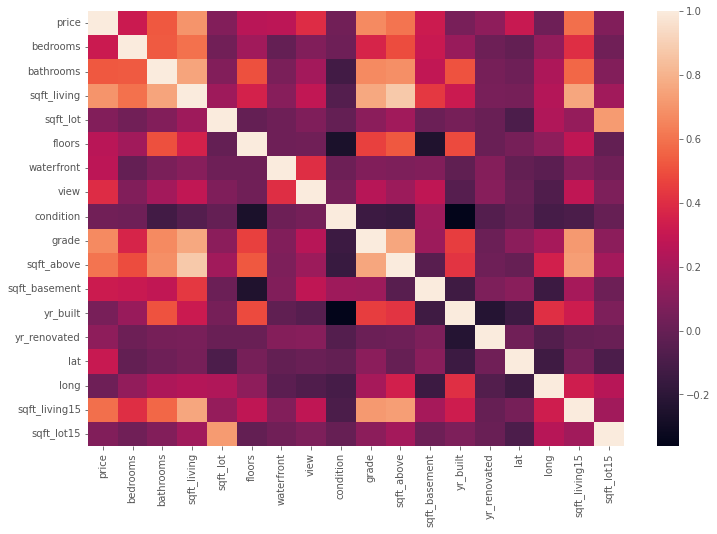

In [18]:
# check for any correlations between variables
corr = df.corr()
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a 
# high influence in price


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

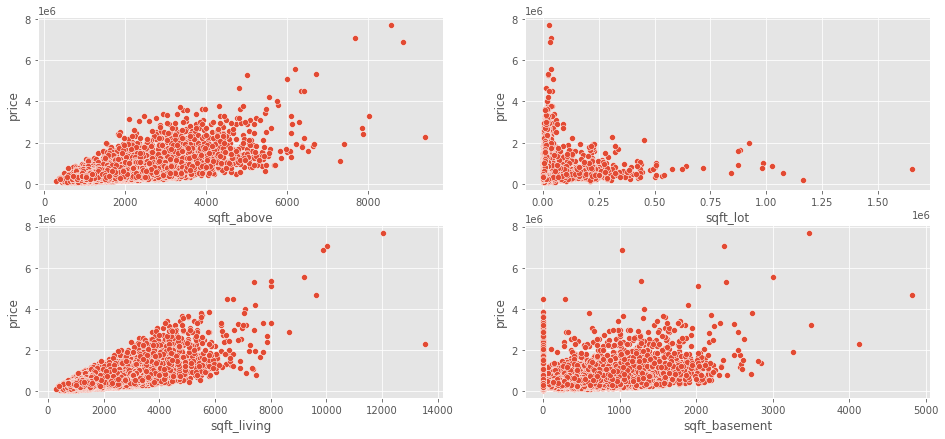

In [19]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,7))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

<AxesSubplot:xlabel='floors', ylabel='price'>

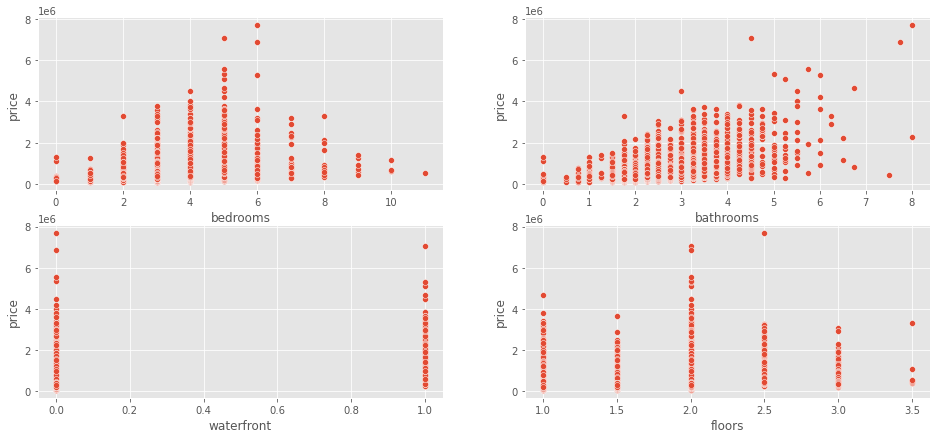

In [20]:
fig = plt.figure(figsize=(16,7))
fig.add_subplot(2,2,1)
sns.scatterplot(df['bedrooms'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['bathrooms'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['waterfront'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['floors'],df['price'])

# Creating Linear Regression Model

In [21]:
#define the x and y 
X= df.drop(['price','date'],axis=1).values
y = df['price'].values 

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [23]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

y_pred

array([ 392052.30936598, 1499728.59924349,  527752.72808461, ...,
        535623.08393385,  334899.35828061,  417778.28135134])

In [25]:
y_pred

array([ 392052.30936598, 1499728.59924349,  527752.72808461, ...,
        535623.08393385,  334899.35828061,  417778.28135134])

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_test,y_pred)

0.6803199085266312

In [27]:
print(y_pred)

[ 392052.30936598 1499728.59924349  527752.72808461 ...  535623.08393385
  334899.35828061  417778.28135134]


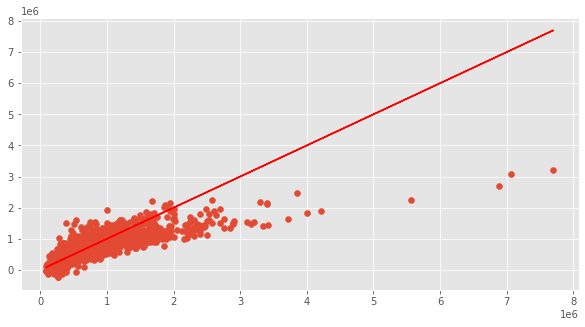

In [28]:
# Our predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.savefig('fig_par.jpg')
# Perfect predictions
plt.plot(y_test,y_test,'r')


In [29]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Diffrance':y_test-y_pred})
pred_y_df[1:10]

,Actual Value,Predicted Value,Diffrance
1,1578000.0,1.499729e+06,78271.400757
2,562100.0,5.277527e+05,34347.271915
3,631500.0,5.838389e+05,47661.069201
4,780000.0,9.928467e+05,-212846.697397
5,485000.0,3.739064e+05,111093.619754
6,340000.0,4.059534e+05,-65953.350167
7,335606.0,4.051736e+05,-69567.646177
8,425000.0,5.754226e+05,-150422.621559
9,490000.0,1.186921e+06,-696921.134941


# Evaluation on Test Data

In [30]:
from sklearn.tree import DecisionTreeRegressor
df_model= DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
y_pred1 = df_model.predict(X_test)

In [31]:
 #evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred1)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred1)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred1)))

Mean Absolute Error: 111645.83
Mean Squared Error: 40230132971.79
Root Mean Squared Error: 200574.51
Variance score is: 0.72


In [32]:
# we are off about 20% (comparing mean absolut error and mean of price)
df['price'].mean()

540088.1417665294

In [33]:
r2_score(y_test,y_pred1)

0.7212822895941178

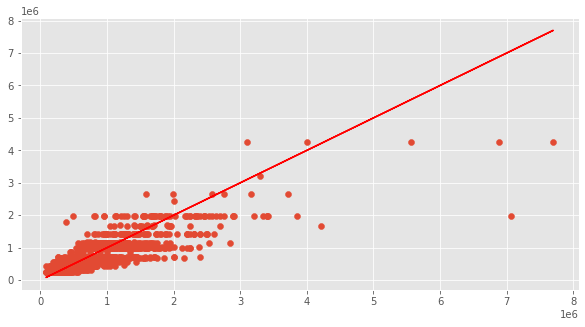

In [34]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred1)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.70
Test Score 0.68
